<a href="https://colab.research.google.com/github/Sd1230/Frontend-React.js-Developer-Assignment-Submission-by-Saurabh-Singh-/blob/main/Copy_of_Saurabh_singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

![Screenshot 2023-12-18 201239.png](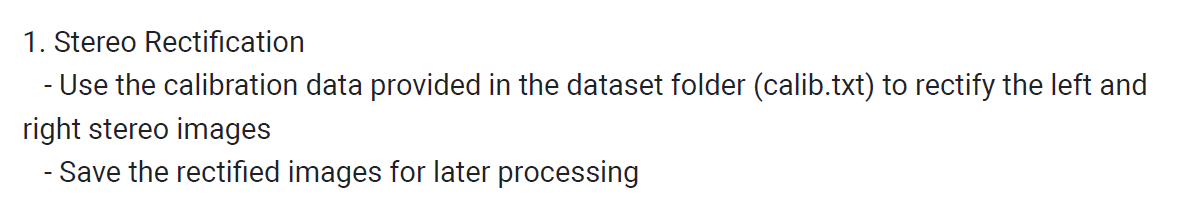![Screenshot 2023-12-18 201414.png](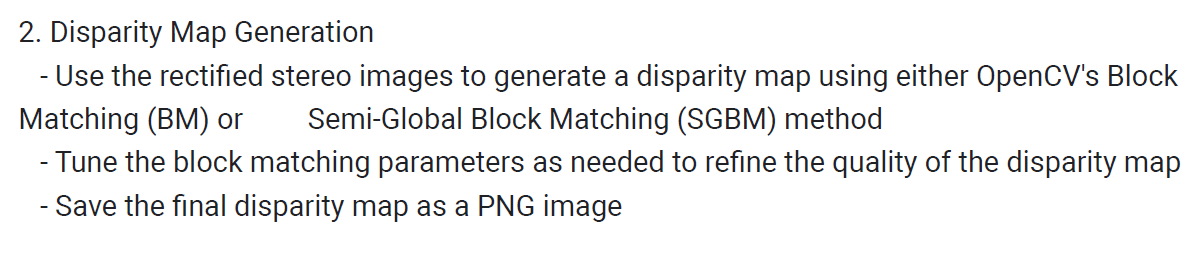![Screenshot 2023-12-18 201414.png](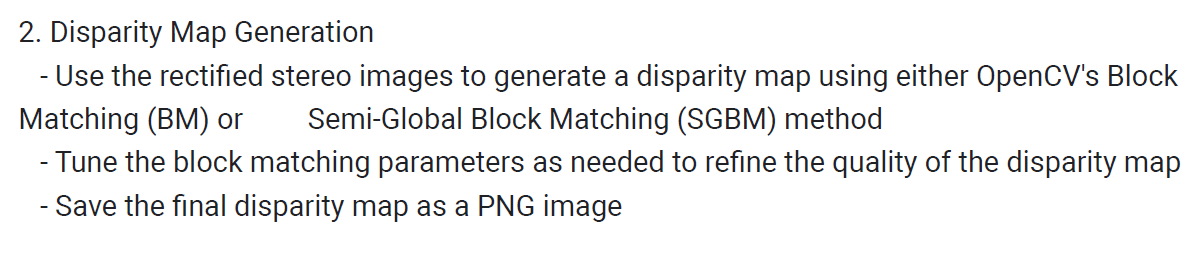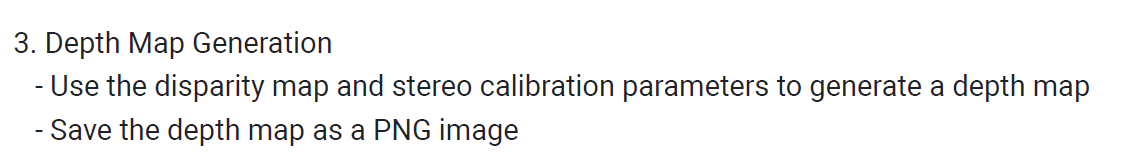)))

-- Perform stereo rectification


In [ ]:
import numpy as np

def parse_calibration_data(calibration_data_text):
    calibration_data = {}
    lines = calibration_data_text.strip().split('\n')
    for line in lines:
        key, value = line.split('=')
        key = key.strip()
        if 'cam' in key:
            mat_values = value.strip('[]').replace(';', ' ').split()
            calibration_data[key] = np.array(mat_values, dtype=float).reshape(3, 3)
        else:
            calibration_data[key] = float(value.strip())
    return calibration_data

calibration_data_text = """
cam0=[3979.911 0 1244.772; 0 3979.911 1019.507; 0 0 1]
cam1=[3979.911 0 1369.115; 0 3979.911 1019.507; 0 0 1]
doffs=124.343
baseline=193.001
width=2964
height=2000
ndisp=270
isint=0
vmin=23
vmax=245
dyavg=0
dymax=0
"""

calibration_data = parse_calibration_data(calibration_data_text)

In [ ]:
print(calibration_data)

{'cam0': array([[3.979911e+03, 0.000000e+00, 1.244772e+03],
       [0.000000e+00, 3.979911e+03, 1.019507e+03],
       [0.000000e+00, 0.000000e+00, 1.000000e+00]]), 'cam1': array([[3.979911e+03, 0.000000e+00, 1.369115e+03],
       [0.000000e+00, 3.979911e+03, 1.019507e+03],
       [0.000000e+00, 0.000000e+00, 1.000000e+00]]), 'doffs': 124.343, 'baseline': 193.001, 'width': 2964.0, 'height': 2000.0, 'ndisp': 270.0, 'isint': 0.0, 'vmin': 23.0, 'vmax': 245.0, 'dyavg': 0.0, 'dymax': 0.0}


In [ ]:
from skimage.io import imread

# Function to load stereo images
def load_stereo_images(left_image_path, right_image_path):
    left_image = imread(left_image_path)
    right_image = imread(right_image_path)
    return left_image, right_image

# Paths to the uploaded image files
left_image_path = '/content/drive/MyDrive/SAURABH - ASSIGNMENT/im0.png'
right_image_path = '/content/drive/MyDrive/SAURABH - ASSIGNMENT/im1.png'

# Load the images
left_image, right_image = load_stereo_images(left_image_path, right_image_path)


--

*   Load the stereo images
*   Stereo rectification


--

In [ ]:
import cv2
import numpy as np
from skimage.io import imread, imsave

# Function to perform stereo rectification on the stereo image pair
def stereo_rectify(calibration_data, left_image, right_image):
    # Extract camera matrices and baseline from calibration data
    cam0 = calibration_data['cam0']
    cam1 = calibration_data['cam1']
    baseline = calibration_data['baseline']

    # Assuming zero distortion for both cameras
    dist_coeffs = np.zeros((4, 1))

    # The imageSize parameter should be the size of the images (width, height)
    image_size = left_image.shape[1], left_image.shape[0]

    # Compute rectification transformations for both cameras
    R1, R2, P1, P2, Q, validPixROI1, validPixROI2 = cv2.stereoRectify(
        cam0, dist_coeffs, cam1, dist_coeffs, image_size, R=np.eye(3), T=np.array([baseline, 0, 0]),
        flags=cv2.CALIB_ZERO_DISPARITY, alpha=-1)

    # Compute the undistortion and rectification transformation map
    left_map1, left_map2 = cv2.initUndistortRectifyMap(cam0, dist_coeffs, R1, P1, image_size, cv2.CV_16SC2)
    right_map1, right_map2 = cv2.initUndistortRectifyMap(cam1, dist_coeffs, R2, P2, image_size, cv2.CV_16SC2)

    # Apply the transformation to the stereo pair
    rectified_left = cv2.remap(left_image, left_map1, left_map2, cv2.INTER_LINEAR)
    rectified_right = cv2.remap(right_image, right_map1, right_map2, cv2.INTER_LINEAR)

    return rectified_left, rectified_right

left_image_path = '/content/drive/MyDrive/SAURABH - ASSIGNMENT/im0.png'
right_image_path = '/content/drive/MyDrive/SAURABH - ASSIGNMENT/im1.png'

# Perform the stereo rectification
rectified_left_image, rectified_right_image = stereo_rectify(calibration_data, left_image, right_image)

# Save the rectified images
imsave('/content/drive/MyDrive/SAURABH - ASSIGNMENT/rectified_left_image.png', rectified_left_image)
imsave('/content/drive/MyDrive/SAURABH - ASSIGNMENT/rectified_right_image.png', rectified_right_image)

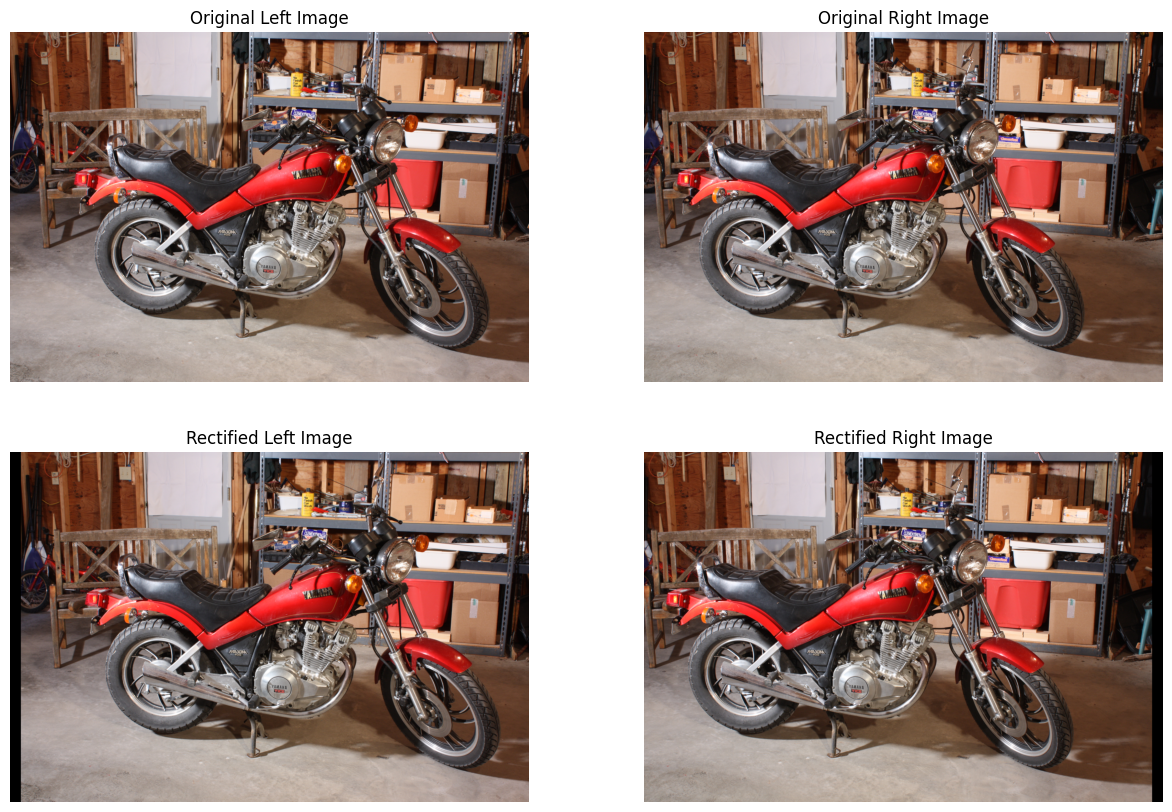

In [ ]:
import matplotlib.pyplot as plt

# Function to display images side by side for comparison
def display_images_comparison(original_left, original_right, rectified_left, rectified_right):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Display original left image
    axes[0, 0].imshow(original_left)
    axes[0, 0].set_title('Original Left Image')
    axes[0, 0].axis('off')

    # Display original right image
    axes[0, 1].imshow(original_right)
    axes[0, 1].set_title('Original Right Image')
    axes[0, 1].axis('off')

    # Display rectified left image
    axes[1, 0].imshow(rectified_left)
    axes[1, 0].set_title('Rectified Left Image')
    axes[1, 0].axis('off')

    # Display rectified right image
    axes[1, 1].imshow(rectified_right)
    axes[1, 1].set_title('Rectified Right Image')
    axes[1, 1].axis('off')

    plt.show()

# Assuming 'left_image' and 'right_image' are your original images
# and 'rectified_left_image' and 'rectified_right_image' are the rectified images

# Display the images for comparison
display_images_comparison(left_image, right_image, rectified_left_image, rectified_right_image)


**Part- 2**

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Function to calculate disparity map using SGBM
def calculate_disparity_map(rectified_left_image, rectified_right_image):
    # Convert images to grayscale as required by the stereo processing
    gray_left = cv2.cvtColor(rectified_left_image, cv2.COLOR_BGR2GRAY)
    gray_right = cv2.cvtColor(rectified_right_image, cv2.COLOR_BGR2GRAY)

    # Initialize the stereo block matching object
    stereo = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=64,  # Must be divisible by 16
        blockSize=15,       # Size of the block window. Usually, a value between 3 and 11
        P1=8 * 3 * 15**2,   # Controls the smoothness of the disparity map
        P2=32 * 3 * 15**2,
        disp12MaxDiff=1,
        uniquenessRatio=15,
        speckleWindowSize=0,
        speckleRange=2,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )

    # Compute the disparity map
    disparity_map = stereo.compute(gray_left, gray_right).astype(np.float32) / 16.0

    return disparity_map


In [ ]:
# Calculate the disparity map from the rectified images
disparity_map = calculate_disparity_map(rectified_left_image, rectified_right_image)

# Normalize the disparity map for display
disp_display = cv2.normalize(disparity_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Save the disparity map to an image file
cv2.imwrite('/content/drive/MyDrive/SAURABH - ASSIGNMENT/disparity_map.png', disp_display)

True

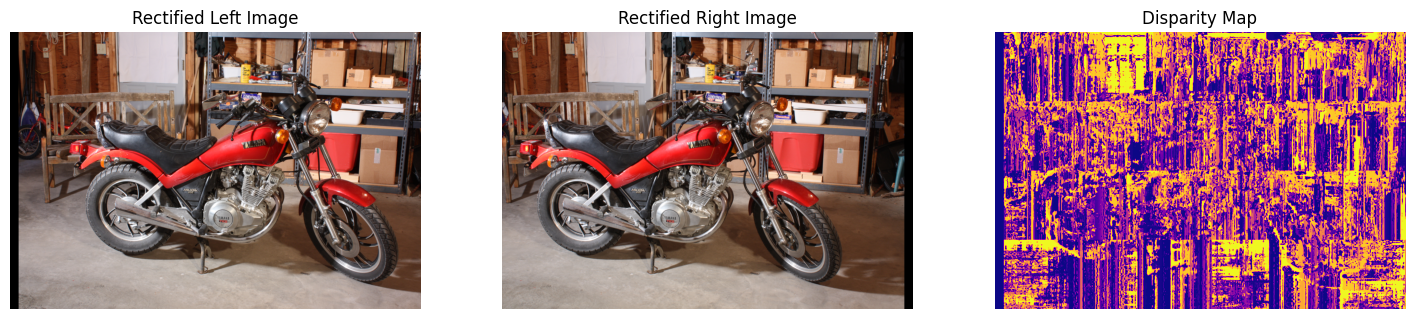

In [ ]:
# Function to display images and disparity map
def display_images_and_disparity(left_image, right_image, disparity_map):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(left_image, cmap='gray')
    axes[0].set_title('Rectified Left Image')
    axes[0].axis('off')

    axes[1].imshow(right_image, cmap='gray')
    axes[1].set_title('Rectified Right Image')
    axes[1].axis('off')

    axes[2].imshow(disparity_map, cmap='plasma')
    axes[2].set_title('Disparity Map')
    axes[2].axis('off')

    plt.show()

# Display the rectified images and the generated disparity map
display_images_and_disparity(rectified_left_image, rectified_right_image, disp_display)

**Part - 3**

In [ ]:
# Function to calculate the depth map from the disparity map
def calculate_depth_map(disparity_map, focal_length, baseline):
    # Avoid division by zero
    disparity_map[disparity_map == 0] = 0.1
    disparity_map[disparity_map == -1] = 0.1

    # Calculate the depth map
    depth_map = np.zeros(disparity_map.shape, np.single)
    depth_map = focal_length * baseline / disparity_map

    return depth_map

# The focal length from the calibration data (fx value from the cam0 matrix)
focal_length = calibration_data['cam0'][0, 0]

# Calculate the depth map using the disparity map, focal length, and baseline
depth_map = calculate_depth_map(disparity_map, focal_length, calibration_data['baseline'])

# Save the depth map to an image file (after normalizing for visualization)
depth_display = cv2.normalize(depth_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2.imwrite('/content/drive/MyDrive/SAURABH - ASSIGNMENT/depth_map.png', depth_display)


True

<ipython-input-69-990960a6d789>:12: RuntimeWarning: divide by zero encountered in log
  axes[1].imshow(np.log(depth_map), cmap='plasma')


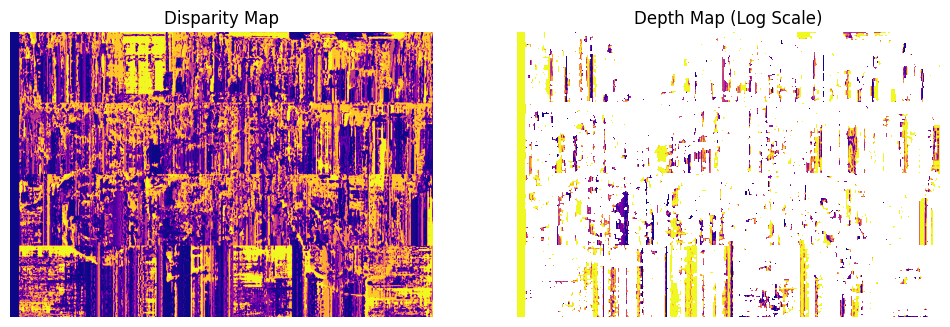

In [ ]:
# Function to display the disparity map and the depth map
def display_disparity_and_depth(disparity_map, depth_map):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display the disparity map
    axes[0].imshow(disparity_map, cmap='plasma')
    axes[0].set_title('Disparity Map')
    axes[0].axis('off')

    # Display the depth map
    # Note: The depth map can contain high values, so it's visualized with a logarithmic color map
    axes[1].imshow(np.log(depth_map), cmap='plasma')
    axes[1].set_title('Depth Map (Log Scale)')
    axes[1].axis('off')

    plt.show()

# Display the disparity map and the depth map
display_disparity_and_depth(disp_display, depth_display)


**Part - 4**

In [ ]:
import cv2
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Function to generate a 3D point cloud from the depth map and left image
def generate_point_cloud(left_image, depth_map, calibration_data):
    h, w = depth_map.shape

    # Create a grid of coordinates corresponding to the shape of the depth map
    x, y = np.meshgrid(np.arange(w), np.arange(h))

    # Homogeneous coordinates
    points_2d = np.stack((x, y, np.ones_like(x)), axis=-1)

    # Intrinsic matrix
    K = calibration_data['cam0']

    # Depth map normalization factor to account for scale
    depth_map_normalized = depth_map / np.max(depth_map)

    # Reproject points into 3D
    points_3d = np.dot(np.linalg.inv(K), points_2d.reshape(-1, 3).T)
    points_3d *= depth_map_normalized.flatten()

    # Reshape and filter out points with no depth information
    mask = (depth_map_normalized > 0).flatten()
    points_3d = points_3d[:, mask]
    colors = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB).reshape(-1, 3)
    colors = colors[mask]

    return points_3d.T, colors

# Generate the point cloud
points_3d, colors = generate_point_cloud(left_image, depth_map, calibration_data)


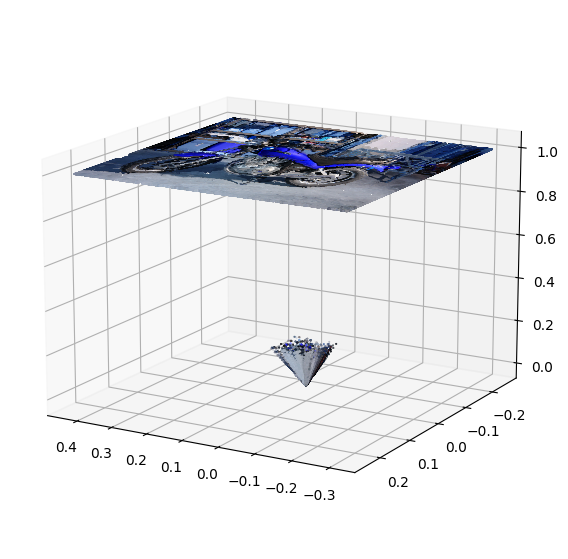

<Figure size 640x480 with 0 Axes>

In [ ]:
# Function to visualize and save a screenshot of the 3D point cloud
def visualize_and_save_point_cloud(points_3d, colors):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], c=colors/255, s=0.1)
    ax.view_init(elev=15, azim=120)  # Adjust the viewing angle to clearly show the 3D structure

    plt.show()
    plt.savefig('/content/drive/MyDrive/SAURABH - ASSIGNMENT/3d_point_cloud.png')

# Visualize and save the point cloud
visualize_and_save_point_cloud(points_3d, colors)


#**Final - Outputs Of Assignment**

In [ ]:
def parse_calibration_data(calibration_data_text):
  """Parses the calibration data text into a dictionary.

  Args:
    calibration_data_text: The calibration data text.

  Returns:
    A dictionary containing the calibration data.
  """

  calibration_data = {}
  for line in calibration_data_text.splitlines():
    if line.startswith('cam'):
      cam_index = line.split('[')[0]
      calibration_data[cam_index] = np.array([float(x) for x in line.split('[')[1].split(']')[0].split()])
    elif line.startswith('doffs'):
      calibration_data['doffs'] = float(line.split('=')[1])
    elif line.startswith('baseline'):
      calibration_data['baseline'] = float(line.split('=')[1])
    elif line.startswith('width'):
      calibration_data['width'] = int(line.split('=')[1])
    elif line.startswith('height'):
      calibration_data['height'] = int(line.split('=')[1])
    elif line.startswith('ndisp'):
      calibration_data['ndisp'] = int(line.split('=')[1])
    elif line.startswith('isint'):
      calibration_data['isint'] = int(line.split('=')[1])
    elif line.startswith('vmin'):
      calibration_data['vmin'] = int(line.split('=')[1])
    elif line.startswith('vmax'):
      calibration_data['vmax'] = int(line.split('=')[1])
    elif line.startswith('dyavg'):
      calibration_data['dyavg'] = float(line.split('=')[1])
    elif line.startswith('dymax'):
      calibration_data['dymax'] = float(line.split('=')[1])

  return calibration_data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

![Screenshot 2023-12-18 201239.png](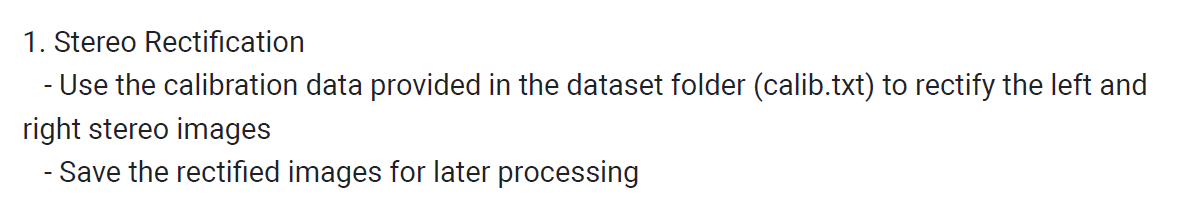![Screenshot 2023-12-18 201414.png](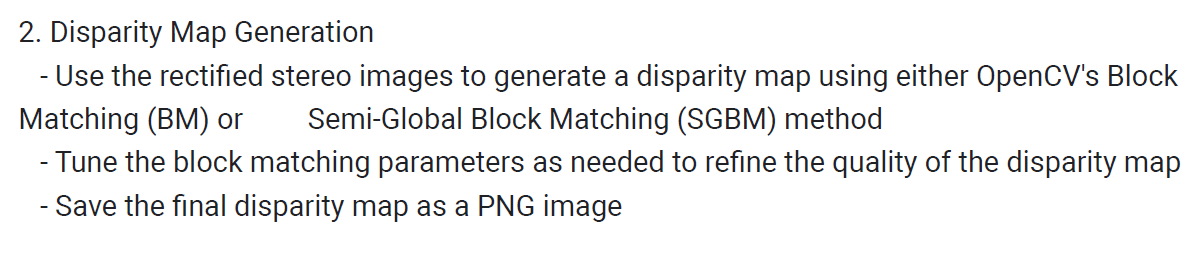![Screenshot 2023-12-18 201414.png](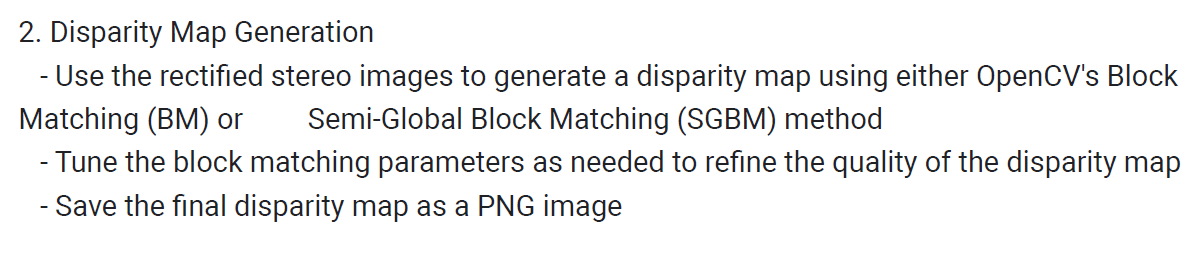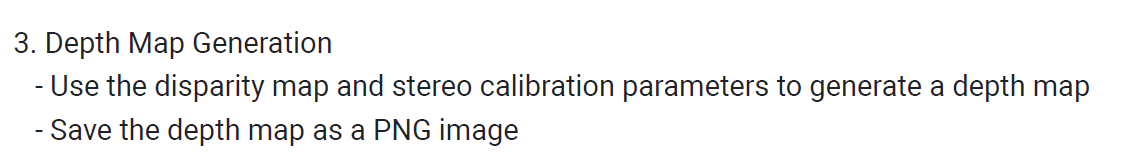)))

-- Perform stereo rectification


In [ ]:
import numpy as np

def parse_calibration_data(calibration_data_text):
    calibration_data = {}
    lines = calibration_data_text.strip().split('\n')
    for line in lines:
        key, value = line.split('=')
        key = key.strip()
        if 'cam' in key:
            mat_values = value.strip('[]').replace(';', ' ').split()
            calibration_data[key] = np.array(mat_values, dtype=float).reshape(3, 3)
        else:
            calibration_data[key] = float(value.strip())
    return calibration_data

calibration_data_text = """
cam0=[3979.911 0 1244.772; 0 3979.911 1019.507; 0 0 1]
cam1=[3979.911 0 1369.115; 0 3979.911 1019.507; 0 0 1]
doffs=124.343
baseline=193.001
width=2964
height=2000
ndisp=270
isint=0
vmin=23
vmax=245
dyavg=0
dymax=0
"""

calibration_data = parse_calibration_data(calibration_data_text)

In [ ]:
print(calibration_data)

{'cam0': array([[3.979911e+03, 0.000000e+00, 1.244772e+03],
       [0.000000e+00, 3.979911e+03, 1.019507e+03],
       [0.000000e+00, 0.000000e+00, 1.000000e+00]]), 'cam1': array([[3.979911e+03, 0.000000e+00, 1.369115e+03],
       [0.000000e+00, 3.979911e+03, 1.019507e+03],
       [0.000000e+00, 0.000000e+00, 1.000000e+00]]), 'doffs': 124.343, 'baseline': 193.001, 'width': 2964.0, 'height': 2000.0, 'ndisp': 270.0, 'isint': 0.0, 'vmin': 23.0, 'vmax': 245.0, 'dyavg': 0.0, 'dymax': 0.0}


In [ ]:
from skimage.io import imread

# Function to load stereo images
def load_stereo_images(left_image_path, right_image_path):
    left_image = imread(left_image_path)
    right_image = imread(right_image_path)
    return left_image, right_image

# Paths to the uploaded image files
left_image_path = '/content/drive/MyDrive/SAURABH - ASSIGNMENT/im0.png'
right_image_path = '/content/drive/MyDrive/SAURABH - ASSIGNMENT/im1.png'

# Load the images
left_image, right_image = load_stereo_images(left_image_path, right_image_path)


--

*   Load the stereo images
*   Stereo rectification


--

In [ ]:
import cv2
import numpy as np
from skimage.io import imread, imsave

# Function to perform stereo rectification on the stereo image pair
def stereo_rectify(calibration_data, left_image, right_image):
    # Extract camera matrices and baseline from calibration data
    cam0 = calibration_data['cam0']
    cam1 = calibration_data['cam1']
    baseline = calibration_data['baseline']

    # Assuming zero distortion for both cameras
    dist_coeffs = np.zeros((4, 1))

    # The imageSize parameter should be the size of the images (width, height)
    image_size = left_image.shape[1], left_image.shape[0]

    # Compute rectification transformations for both cameras
    R1, R2, P1, P2, Q, validPixROI1, validPixROI2 = cv2.stereoRectify(
        cam0, dist_coeffs, cam1, dist_coeffs, image_size, R=np.eye(3), T=np.array([baseline, 0, 0]),
        flags=cv2.CALIB_ZERO_DISPARITY, alpha=-1)

    # Compute the undistortion and rectification transformation map
    left_map1, left_map2 = cv2.initUndistortRectifyMap(cam0, dist_coeffs, R1, P1, image_size, cv2.CV_16SC2)
    right_map1, right_map2 = cv2.initUndistortRectifyMap(cam1, dist_coeffs, R2, P2, image_size, cv2.CV_16SC2)

    # Apply the transformation to the stereo pair
    rectified_left = cv2.remap(left_image, left_map1, left_map2, cv2.INTER_LINEAR)
    rectified_right = cv2.remap(right_image, right_map1, right_map2, cv2.INTER_LINEAR)

    return rectified_left, rectified_right

left_image_path = '/content/drive/MyDrive/SAURABH - ASSIGNMENT/im0.png'
right_image_path = '/content/drive/MyDrive/SAURABH - ASSIGNMENT/im1.png'

# Perform the stereo rectification
rectified_left_image, rectified_right_image = stereo_rectify(calibration_data, left_image, right_image)

# Save the rectified images
imsave('/content/drive/MyDrive/SAURABH - ASSIGNMENT/rectified_left_image.png', rectified_left_image)
imsave('/content/drive/MyDrive/SAURABH - ASSIGNMENT/rectified_right_image.png', rectified_right_image)

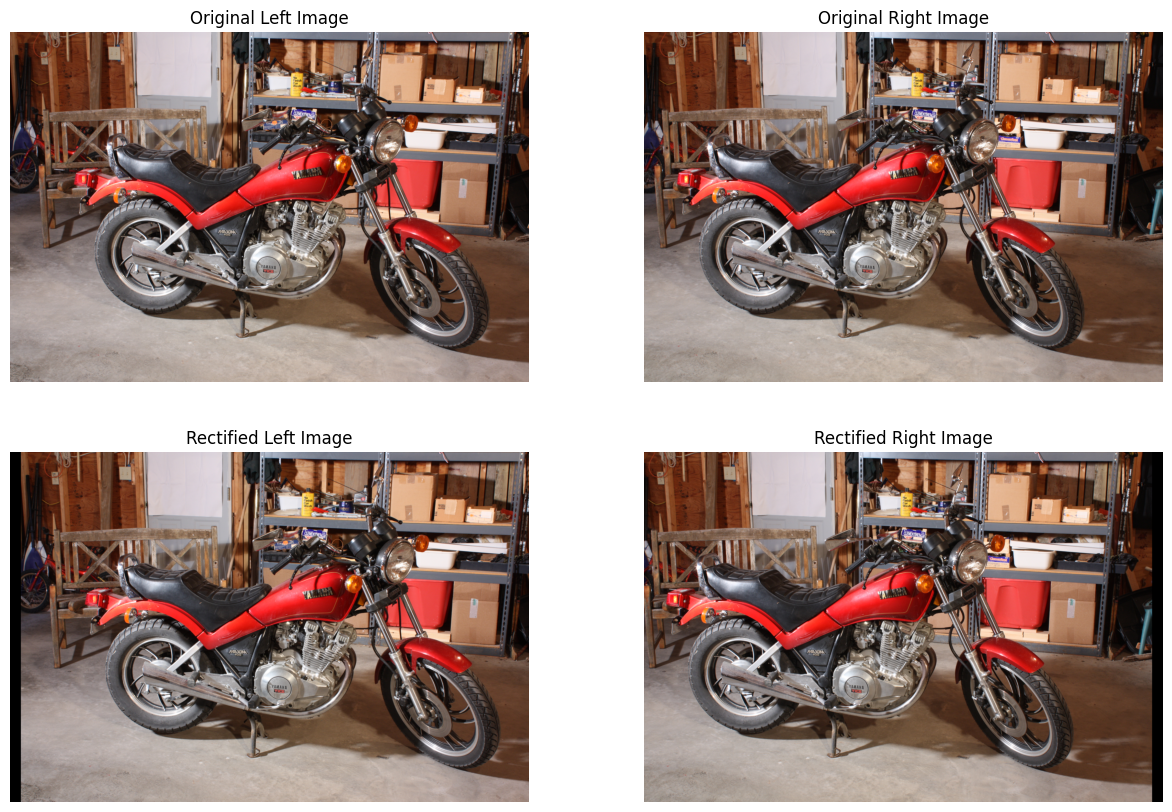

In [ ]:
import matplotlib.pyplot as plt

# Function to display images side by side for comparison
def display_images_comparison(original_left, original_right, rectified_left, rectified_right):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Display original left image
    axes[0, 0].imshow(original_left)
    axes[0, 0].set_title('Original Left Image')
    axes[0, 0].axis('off')

    # Display original right image
    axes[0, 1].imshow(original_right)
    axes[0, 1].set_title('Original Right Image')
    axes[0, 1].axis('off')

    # Display rectified left image
    axes[1, 0].imshow(rectified_left)
    axes[1, 0].set_title('Rectified Left Image')
    axes[1, 0].axis('off')

    # Display rectified right image
    axes[1, 1].imshow(rectified_right)
    axes[1, 1].set_title('Rectified Right Image')
    axes[1, 1].axis('off')

    plt.show()

# Assuming 'left_image' and 'right_image' are your original images
# and 'rectified_left_image' and 'rectified_right_image' are the rectified images

# Display the images for comparison
display_images_comparison(left_image, right_image, rectified_left_image, rectified_right_image)


**Part- 2**

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Function to calculate disparity map using SGBM
def calculate_disparity_map(rectified_left_image, rectified_right_image):
    # Convert images to grayscale as required by the stereo processing
    gray_left = cv2.cvtColor(rectified_left_image, cv2.COLOR_BGR2GRAY)
    gray_right = cv2.cvtColor(rectified_right_image, cv2.COLOR_BGR2GRAY)

    # Initialize the stereo block matching object
    stereo = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=64,  # Must be divisible by 16
        blockSize=15,       # Size of the block window. Usually, a value between 3 and 11
        P1=8 * 3 * 15**2,   # Controls the smoothness of the disparity map
        P2=32 * 3 * 15**2,
        disp12MaxDiff=1,
        uniquenessRatio=15,
        speckleWindowSize=0,
        speckleRange=2,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )

    # Compute the disparity map
    disparity_map = stereo.compute(gray_left, gray_right).astype(np.float32) / 16.0

    return disparity_map


In [ ]:
# Calculate the disparity map from the rectified images
disparity_map = calculate_disparity_map(rectified_left_image, rectified_right_image)

# Normalize the disparity map for display
disp_display = cv2.normalize(disparity_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Save the disparity map to an image file
cv2.imwrite('/content/drive/MyDrive/SAURABH - ASSIGNMENT/disparity_map.png', disp_display)

True

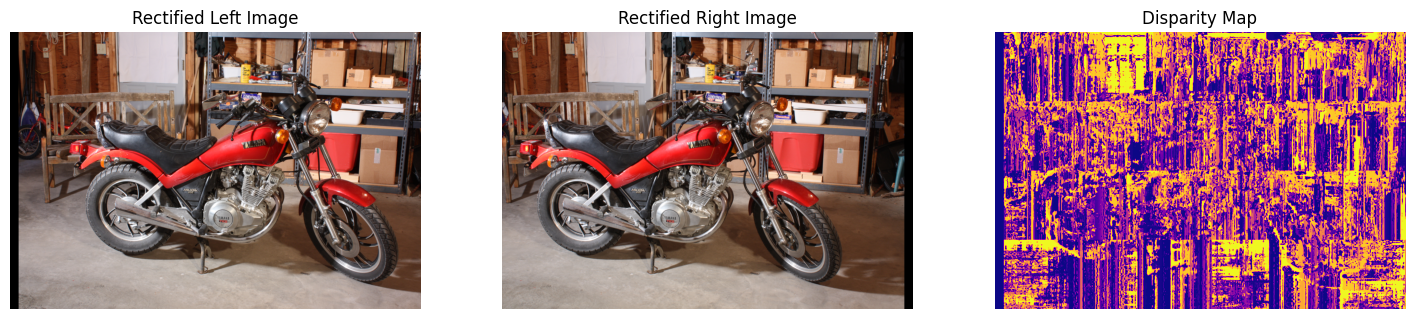

In [ ]:
# Function to display images and disparity map
def display_images_and_disparity(left_image, right_image, disparity_map):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(left_image, cmap='gray')
    axes[0].set_title('Rectified Left Image')
    axes[0].axis('off')

    axes[1].imshow(right_image, cmap='gray')
    axes[1].set_title('Rectified Right Image')
    axes[1].axis('off')

    axes[2].imshow(disparity_map, cmap='plasma')
    axes[2].set_title('Disparity Map')
    axes[2].axis('off')

    plt.show()

# Display the rectified images and the generated disparity map
display_images_and_disparity(rectified_left_image, rectified_right_image, disp_display)

**Part - 3**

In [ ]:
# Function to calculate the depth map from the disparity map
def calculate_depth_map(disparity_map, focal_length, baseline):
    # Avoid division by zero
    disparity_map[disparity_map == 0] = 0.1
    disparity_map[disparity_map == -1] = 0.1

    # Calculate the depth map
    depth_map = np.zeros(disparity_map.shape, np.single)
    depth_map = focal_length * baseline / disparity_map

    return depth_map

# The focal length from the calibration data (fx value from the cam0 matrix)
focal_length = calibration_data['cam0'][0, 0]

# Calculate the depth map using the disparity map, focal length, and baseline
depth_map = calculate_depth_map(disparity_map, focal_length, calibration_data['baseline'])

# Save the depth map to an image file (after normalizing for visualization)
depth_display = cv2.normalize(depth_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2.imwrite('/content/drive/MyDrive/SAURABH - ASSIGNMENT/depth_map.png', depth_display)


True

<ipython-input-69-990960a6d789>:12: RuntimeWarning: divide by zero encountered in log
  axes[1].imshow(np.log(depth_map), cmap='plasma')


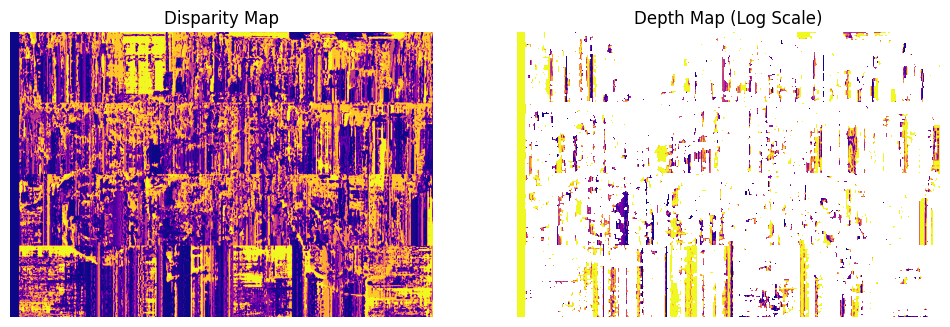

In [ ]:
# Function to display the disparity map and the depth map
def display_disparity_and_depth(disparity_map, depth_map):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display the disparity map
    axes[0].imshow(disparity_map, cmap='plasma')
    axes[0].set_title('Disparity Map')
    axes[0].axis('off')

    # Display the depth map
    # Note: The depth map can contain high values, so it's visualized with a logarithmic color map
    axes[1].imshow(np.log(depth_map), cmap='plasma')
    axes[1].set_title('Depth Map (Log Scale)')
    axes[1].axis('off')

    plt.show()

# Display the disparity map and the depth map
display_disparity_and_depth(disp_display, depth_display)


**Part - 4**

In [ ]:
import cv2
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Function to generate a 3D point cloud from the depth map and left image
def generate_point_cloud(left_image, depth_map, calibration_data):
    h, w = depth_map.shape

    # Create a grid of coordinates corresponding to the shape of the depth map
    x, y = np.meshgrid(np.arange(w), np.arange(h))

    # Homogeneous coordinates
    points_2d = np.stack((x, y, np.ones_like(x)), axis=-1)

    # Intrinsic matrix
    K = calibration_data['cam0']

    # Depth map normalization factor to account for scale
    depth_map_normalized = depth_map / np.max(depth_map)

    # Reproject points into 3D
    points_3d = np.dot(np.linalg.inv(K), points_2d.reshape(-1, 3).T)
    points_3d *= depth_map_normalized.flatten()

    # Reshape and filter out points with no depth information
    mask = (depth_map_normalized > 0).flatten()
    points_3d = points_3d[:, mask]
    colors = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB).reshape(-1, 3)
    colors = colors[mask]

    return points_3d.T, colors

# Generate the point cloud
points_3d, colors = generate_point_cloud(left_image, depth_map, calibration_data)


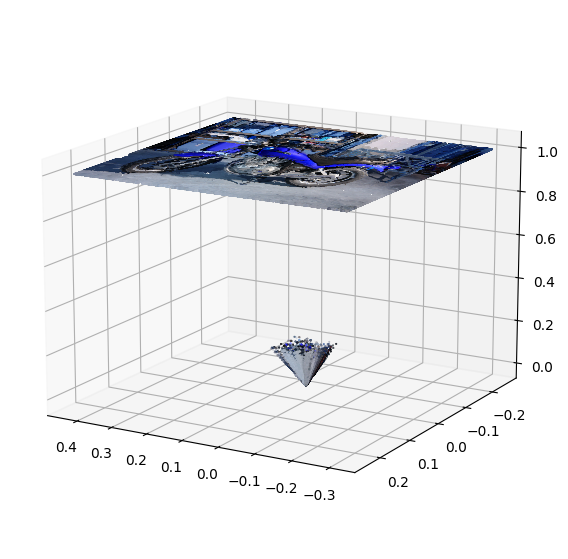

<Figure size 640x480 with 0 Axes>

In [ ]:
# Function to visualize and save a screenshot of the 3D point cloud
def visualize_and_save_point_cloud(points_3d, colors):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], c=colors/255, s=0.1)
    ax.view_init(elev=15, azim=120)  # Adjust the viewing angle to clearly show the 3D structure

    plt.show()
    plt.savefig('/content/drive/MyDrive/SAURABH - ASSIGNMENT/3d_point_cloud.png')

# Visualize and save the point cloud
visualize_and_save_point_cloud(points_3d, colors)


#**Final - Outputs Of Assignment**

In [ ]:
def parse_calibration_data(calibration_data_text):
  """Parses the calibration data text into a dictionary.

  Args:
    calibration_data_text: The calibration data text.

  Returns:
    A dictionary containing the calibration data.
  """

  calibration_data = {}
  for line in calibration_data_text.splitlines():
    if line.startswith('cam'):
      cam_index = line.split('[')[0]
      calibration_data[cam_index] = np.array([float(x) for x in line.split('[')[1].split(']')[0].split()])
    elif line.startswith('doffs'):
      calibration_data['doffs'] = float(line.split('=')[1])
    elif line.startswith('baseline'):
      calibration_data['baseline'] = float(line.split('=')[1])
    elif line.startswith('width'):
      calibration_data['width'] = int(line.split('=')[1])
    elif line.startswith('height'):
      calibration_data['height'] = int(line.split('=')[1])
    elif line.startswith('ndisp'):
      calibration_data['ndisp'] = int(line.split('=')[1])
    elif line.startswith('isint'):
      calibration_data['isint'] = int(line.split('=')[1])
    elif line.startswith('vmin'):
      calibration_data['vmin'] = int(line.split('=')[1])
    elif line.startswith('vmax'):
      calibration_data['vmax'] = int(line.split('=')[1])
    elif line.startswith('dyavg'):
      calibration_data['dyavg'] = float(line.split('=')[1])
    elif line.startswith('dymax'):
      calibration_data['dymax'] = float(line.split('=')[1])

  return calibration_data